## Gaussian Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# Config parameters

N = 10                     # number of training points
n = 50                     # number of test points
sn = 0.00005               # noise variance
kernel_param = 0.1         # rbf kernel parameter
gamma= 0.5/kernel_param    # Overall rbf_kernel() gamma

In [3]:
# Definition of the unknown function (sine) we are trying to approximate

f = lambda x: np.sin(0.9*x).flatten()

In [4]:
# Images centering
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [27]:

def plot_f(x,y, title, symbol, color, size):
    plt.figure(1, figsize=size)
    plt.clf()
    plt.plot(x, y, symbol, color = color)
    plt.title(title)
    plt.axis([-5, 5, -4, 4])
    plt.grid()

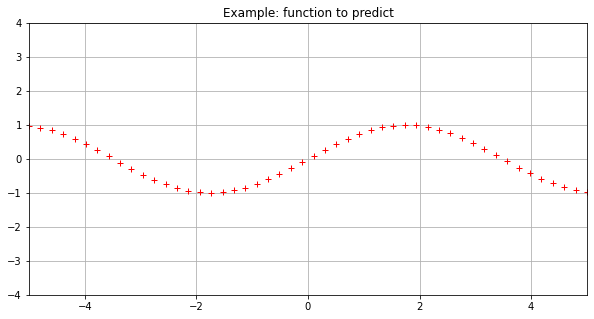

In [28]:
# Example 
Xe = np.linspace(-5,5, n)
Ye = f(Xe)

plot_f(Xe, Ye, 'Example: function to predict', symbol='+', color='r', size=(10, 5))

#### Test points

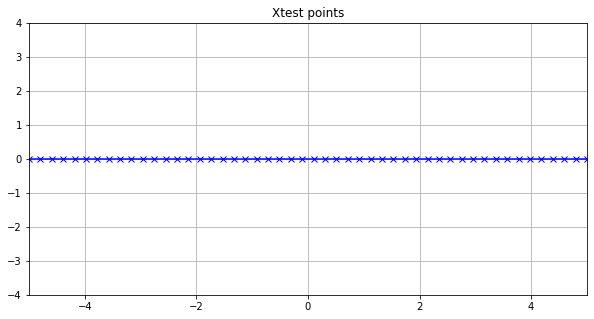

In [29]:
# We pick up n points equally spaced on x-axis in the range (-5, 5)
Xtest = np.linspace(-5,5, n).reshape(-1,1)

y = np.zeros(n)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, y, marker='x', color = 'b')
plt.title('Xtest points')
plt.axis([-5, 5, -4, 4])
plt.grid()

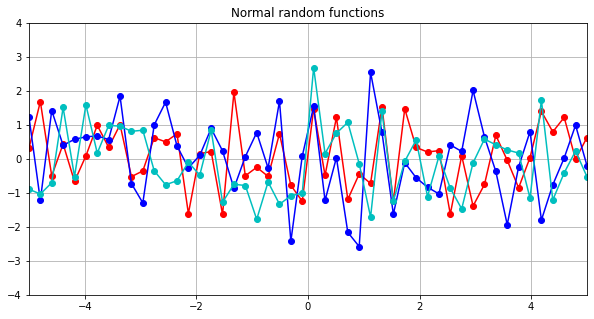

In [30]:
# We sample 3 times n random points from a standard normal 
sample_f = np.random.normal(size=(n,3))

plt.figure(1, figsize=(10, 5))

plt.clf()
plt.plot(Xtest, sample_f[:,0], marker='o', color = 'r')
plt.plot(Xtest, sample_f[:,1], marker='o', color = 'b')
plt.plot(Xtest, sample_f[:,2], marker='o', color = 'c')
plt.title('Normal random functions')

plt.axis([-5, 5, -4, 4])
plt.grid()

In [9]:
# We calculate the covariance matrix (kernel) on the 50 equally spaced Xtest points 
Kss = rbf_kernel(Xtest, Xtest, gamma)

# Cholesky matrix calculation
Lss = np.linalg.cholesky(Kss + sn*np.eye(n))

# Note that Cholesky matrix is used to create correlations among random variables. 
# Suppose that x1 and x2 are independent standard normal variables. 
# The matrix Ls can be used to create new variables z1 and z2 such that the covariance of z1 and z2 equals Σ
# In particular, if you generate p standard normal variates, the Cholesky transformation maps the variables into variables
# for the multivariate normal distribution with covariance matrix Σ and centered at the origin (denoted MVN(0, Σ)).

# See proof below

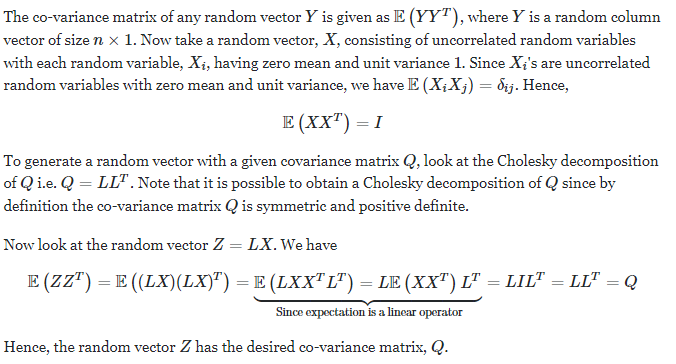

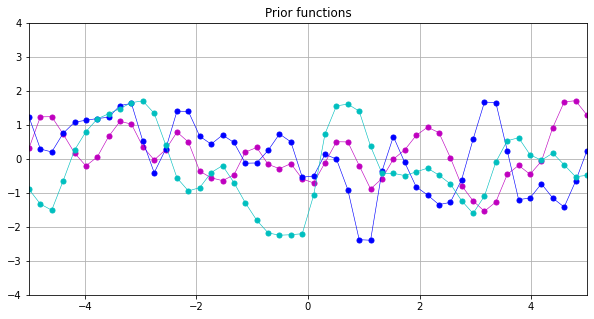

In [31]:
# By Cholesky trasformation we force the priors to have the same covariance matrix of the equally spaced Xtest points 

f_prior = np.dot(Lss, sample_f)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, f_prior[:,0], marker='o', color = 'm', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,1], marker='o', color = 'b', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,2], marker='o', color = 'c', linewidth=0.6, markersize=5)
plt.title('Prior functions')
plt.axis([-5, 5, -4, 4])
plt.grid()

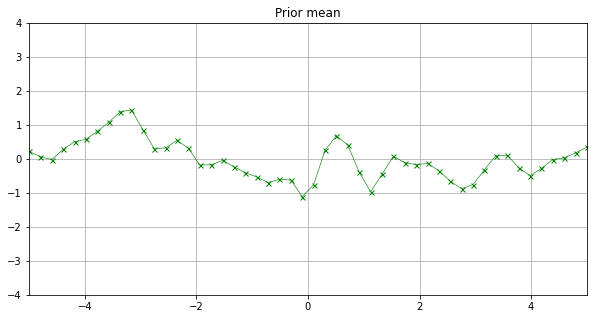

In [32]:
# The resulting priors have mean at each x that tends to zero wwith increasing n

prior_mean = f_prior.mean(axis=1)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, prior_mean, marker='x', color = 'g', linewidth=0.6, markersize=5)
plt.title('Prior mean')
plt.axis([-5, 5, -4, 4])
plt.grid()

#### Train points

Xtrain:
[[ 0.10204082]
 [ 2.75510204]
 [ 0.30612245]
 [-0.71428571]
 [-5.        ]
 [-1.32653061]
 [ 1.12244898]
 [-5.        ]
 [ 2.75510204]
 [-0.91836735]]
f(Xtrain):
[ 0.0917077   0.61469625  0.27203793 -0.5994847   0.97753012 -0.92980311
  0.84694037  0.97753012  0.61469625 -0.73558553]
y = f(X) + noise: 
[ 0.09171123  0.61474238  0.27204284 -0.59949763  0.97762191 -0.92980855
  0.84691391  0.97762711  0.61470046 -0.73568896]


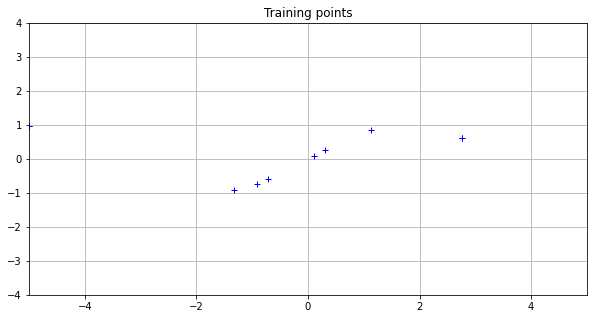

In [33]:
# We sample now some input points without noise from the initial unknown sine function and we use them as training points 
# to adjust our prior functions

# Sample x points
Xdomain = np.reshape(Xtest, np.product(Xtest.shape))
Xtrain = np.random.choice(Xdomain, size=(N, 1))
print('Xtrain:')
print(Xtrain)

print('f(Xtrain):')
print(f(Xtrain))

# Coresponding y=f(x) with noise
Ytrain = f(Xtrain) + sn*np.random.randn(N)

print('y = f(X) + noise: ')
print(Ytrain)

'''
plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, f(Xtest), marker='o', color = 'g', linewidth=0.6, markersize=3)
plt.plot(Xtrain, Ytrain, symbol='+', color='r', markersize=10)

plt.title('Training points (+)')
plt.axis([-5, 5, -3, 3])
'''

plot_f(Xtrain, Ytrain, 'Training points', symbol='+', color='b', size=(10,5))

### Theory overview

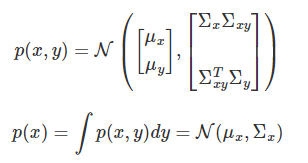

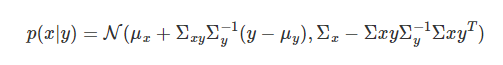

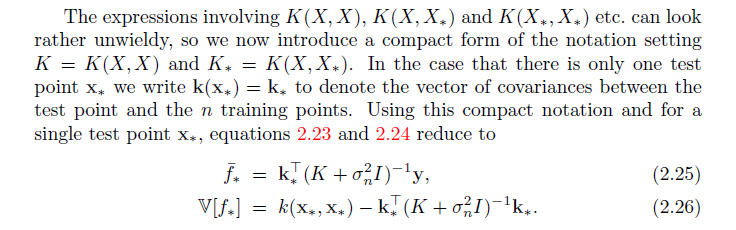

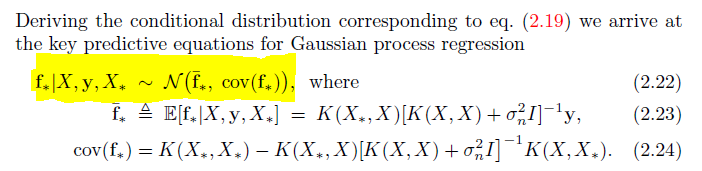

In [34]:
# By using the Cholesky decomposition we have:

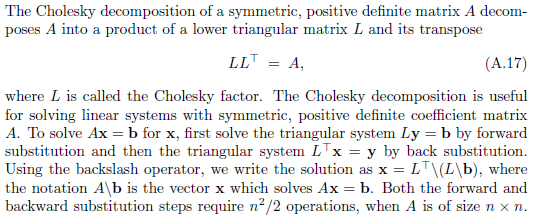

In [35]:
# The algorithm is:

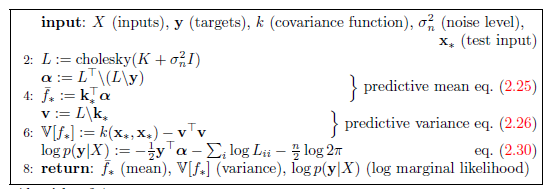

In [38]:
# Compute mean at our test points

K = rbf_kernel(Xtrain, Xtrain, gamma)
L = np.linalg.cholesky(K + sn*np.eye(len(Xtrain)))

Ly = np.linalg.solve(L, Ytrain)
alpha = np.linalg.solve(L.T, Ly)

Ks = rbf_kernel(Xtrain, Xtest, gamma)

meanFs = np.dot(Ks.T, alpha)

print('Predictive mean eq.2.25')
print(meanFs.shape)
print(meanFs)



# Compute the variance and standard deviation at our test points

#varFs = np.diag(Kss) - np.sum(Lk**2, axis=0) 
v = np.linalg.solve(L, Ks)
covFs = Kss - np.dot(v.T, v)   # Covariance matrix
varFs = np.diag(covFs)         # np.diag gets the diagonal elements (variance) from argument matrix
stdFs = np.sqrt(varFs)
print('\nPredictive variance, diagonal of eq.2.26')
print(meanFs.shape)
print(varFs)

Predictive mean eq.2.25
(50,)
[ 9.77600071e-01  7.93817906e-01  4.25010726e-01  1.50036948e-01
  3.49233492e-02  5.35985307e-03  5.42386929e-04  3.61896813e-05
  1.59134346e-06  4.80262781e-09 -1.42566509e-06 -3.24247568e-05
 -4.85928824e-04 -4.80140761e-03 -3.12812618e-02 -1.34423728e-01
 -3.81670739e-01 -7.21030598e-01 -9.29764749e-01 -8.86071912e-01
 -7.35691612e-01 -5.99472594e-01 -4.40541187e-01 -2.62480051e-01
 -9.53461854e-02  9.17250480e-02  2.72019364e-01  3.88410852e-01
  5.23213191e-01  7.37456963e-01  8.46872325e-01  6.77720358e-01
  3.62135061e-01  1.31019041e-01  5.16684245e-02  9.89011502e-02
  2.67703690e-01  4.99175180e-01  6.14706052e-01  4.99144434e-01
  2.67242299e-01  9.43416634e-02  2.19594366e-02  3.37021954e-03
  3.41047227e-04  2.27556993e-05  1.00111780e-06  2.90401938e-08
  5.55434910e-10  7.00464560e-12]

Predictive variance, diagonal of eq.2.26
(50,)
[2.49993750e-05 3.40661440e-01 8.10997968e-01 9.76446083e-01
 9.98723860e-01 9.99969941e-01 9.99999692e-01 9

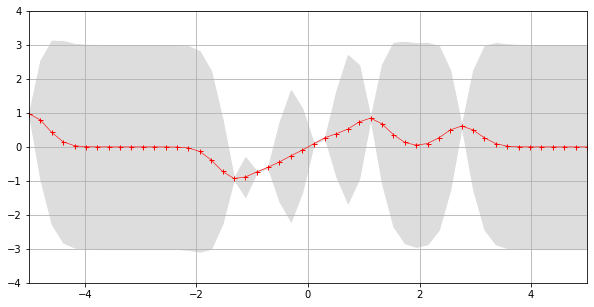

In [39]:
# Let's plot the mean and the standard deviation
plt.figure(1, figsize=(10, 5))
plt.clf()

plt.plot(Xtest, meanFs, 'r', marker='+', color = 'r', linewidth=0.6, markersize=5)
plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")
plt.axis([-5, 5, -4, 4])
plt.grid()

In [40]:
# We sample now 3 regression functions from the posterior distribution

f_post = np.random.multivariate_normal(meanFs, covFs, 3).T
f_post

array([[ 0.97732098,  0.98348818,  0.97826084],
       [ 0.62151299,  0.98953695,  1.4102242 ],
       [-0.42378429,  1.22726972,  1.36032534],
       [-0.99422577,  1.1692074 ,  1.15447195],
       [-0.56185652,  0.4948575 ,  0.61941382],
       [ 0.43537804, -0.10764876,  0.12249274],
       [ 1.18214778, -0.00383756, -0.10720855],
       [ 1.55799897,  0.24907115, -0.85913268],
       [ 1.60755382, -0.24962992, -1.73202469],
       [ 1.37970479, -0.69225661, -1.10924948],
       [ 0.99027012, -0.50752684,  0.19878048],
       [ 0.24410308, -0.39596726,  0.33590645],
       [-0.00882679,  0.08801535, -0.79922535],
       [ 0.3541651 ,  0.9940617 , -2.01813214],
       [ 0.30158432,  1.03147003, -1.98891985],
       [ 0.18109699,  0.38694348, -1.49595134],
       [ 0.10892488, -0.26682727, -1.56650902],
       [-0.58191936, -0.90968195, -1.47007344],
       [-0.93693124, -0.93081022, -0.9222159 ],
       [-0.70676872, -0.63153288, -0.71342533],
       [-0.74160882, -0.73788296, -0.737

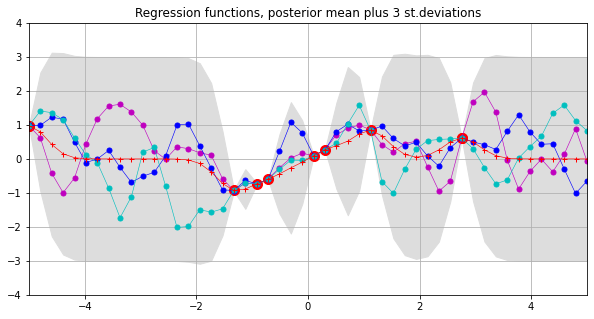

In [41]:
# Plot the functions sampled from the posterior distribution

plt.figure(1, figsize=(10, 5))
plt.clf()

plt.plot(Xtrain, Ytrain, 'ro', ms=10)

plt.plot(Xtest, f_post[:,0], marker='o', color = 'm', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,1], marker='o', color = 'b', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,2], marker='o', color = 'c', markersize=5, linewidth=0.6)

plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")

plt.plot(Xtest, meanFs, marker='+', color='r', markersize=5, linewidth=0.6)

plt.savefig('predictive.png', bbox_inches='tight')
plt.title('Regression functions, posterior mean plus 3 st.deviations')
plt.axis([-5, 5, -4, 4])
plt.grid()